In [1]:
# Step 1: Import Required Libraries
# ---------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, r2_score

import pickle
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
print("Libraries imported successfully!")

Libraries imported successfully!


In [4]:
df = pd.read_csv('2023 Yala.csv')

In [5]:
# Create DataFrame for easier handling


print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())

Dataset loaded successfully!
Dataset shape: (26, 15)

First 5 rows:
   District Major_Schemes_Sown Minor_Schemes_Sown Rainfed_Sown  \
0   COLOMBO                210                278         1730   
1   GAMPAHA               1570               1481         5609   
2  KALUTARA                112               1090         7930   
3     KANDY               4196               3296         2408   
4    MATALE               6820               4124          813   

  All_Schemes_Sown Major_Schemes_Harvested Minor_Schemes_Harvested  \
0             2218                     208                     278   
1             8660                    1454                    1474   
2             9132                     112                    1090   
3             9900                    4196                    3266   
4            11757                    6771                    4039   

  Rainfed_Harvested All_Schemes_Harvested Major_Schemes_Yield  \
0              1729                  2215        

In [6]:
# Basic information about the dataset
print("\n1. Dataset Info:")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print(f"Data types:\n{df.dtypes}")


1. Dataset Info:
Shape: (26, 15)
Columns: ['District', 'Major_Schemes_Sown', 'Minor_Schemes_Sown', 'Rainfed_Sown', 'All_Schemes_Sown', 'Major_Schemes_Harvested', 'Minor_Schemes_Harvested', 'Rainfed_Harvested', 'All_Schemes_Harvested', 'Major_Schemes_Yield', 'Minor_Schemes_Yield', 'Rainfed_Yield', 'Average_Yield', 'Nett_Extent_Harvested', 'Total_Production']
Data types:
District                   object
Major_Schemes_Sown         object
Minor_Schemes_Sown         object
Rainfed_Sown               object
All_Schemes_Sown           object
Major_Schemes_Harvested    object
Minor_Schemes_Harvested    object
Rainfed_Harvested          object
All_Schemes_Harvested      object
Major_Schemes_Yield        object
Minor_Schemes_Yield        object
Rainfed_Yield              object
Average_Yield              object
Nett_Extent_Harvested      object
Total_Production           object
dtype: object


In [7]:
print("\n2. Statistical Summary:")
print(df.describe())


2. Statistical Summary:
       District Major_Schemes_Sown Minor_Schemes_Sown Rainfed_Sown  \
count        26                 26                 26           26   
unique       26                 24                 26           22   
top     COLOMBO                  -                278            -   
freq          1                  3                  1            5   

       All_Schemes_Sown Major_Schemes_Harvested Minor_Schemes_Harvested  \
count                26                      26                      26   
unique               26                      24                      26   
top                2218                       -                     278   
freq                  1                       3                       1   

       Rainfed_Harvested All_Schemes_Harvested Major_Schemes_Yield  \
count                 26                    26                  26   
unique                22                    26                  24   
top                    -              

In [8]:
print("\n3. Target Distribution:")
print(df['Total_Production'].value_counts())
print(f"\nPercentage distribution:")
print(df['Total_Production'].value_counts(normalize=True) * 100)


3. Target Distribution:
Total_Production
4464       1
18401      1
20913      1
29335      1
41359      1
5653       1
8527       1
22989      1
146310     1
-          1
10918      1
21243      1
23973      1
24355      1
105366     1
261938     1
126977     1
206292     1
55932      1
224321     1
287105     1
51003      1
65066      1
37169      1
17782      1
1817391    1
Name: count, dtype: int64

Percentage distribution:
Total_Production
4464       3.846154
18401      3.846154
20913      3.846154
29335      3.846154
41359      3.846154
5653       3.846154
8527       3.846154
22989      3.846154
146310     3.846154
-          3.846154
10918      3.846154
21243      3.846154
23973      3.846154
24355      3.846154
105366     3.846154
261938     3.846154
126977     3.846154
206292     3.846154
55932      3.846154
224321     3.846154
287105     3.846154
51003      3.846154
65066      3.846154
37169      3.846154
17782      3.846154
1817391    3.846154
Name: proportion, dtype: float6

#  Check for Missing Values

In [9]:
# --------------------------------
print("\n4. Missing Values Check:")
missing_values = df.isnull().sum()
print(missing_values)


4. Missing Values Check:
District                   0
Major_Schemes_Sown         0
Minor_Schemes_Sown         0
Rainfed_Sown               0
All_Schemes_Sown           0
Major_Schemes_Harvested    0
Minor_Schemes_Harvested    0
Rainfed_Harvested          0
All_Schemes_Harvested      0
Major_Schemes_Yield        0
Minor_Schemes_Yield        0
Rainfed_Yield              0
Average_Yield              0
Nett_Extent_Harvested      0
Total_Production           0
dtype: int64


#  Data Visualization


5. Creating Visualizations...


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 [Text(0, 0, '4464'),
  Text(1, 0, '18401'),
  Text(2, 0, '20913'),
  Text(3, 0, '29335'),
  Text(4, 0, '41359'),
  Text(5, 0, '5653'),
  Text(6, 0, '8527'),
  Text(7, 0, '22989'),
  Text(8, 0, '146310'),
  Text(9, 0, '-'),
  Text(10, 0, '10918'),
  Text(11, 0, '21243'),
  Text(12, 0, '23973'),
  Text(13, 0, '24355'),
  Text(14, 0, '105366'),
  Text(15, 0, '261938'),
  Text(16, 0, '126977'),
  Text(17, 0, '206292'),
  Text(18, 0, '55932'),
  Text(19, 0, '224321'),
  Text(20, 0, '287105'),
  Text(21, 0, '51003'),
  Text(22, 0, '65066'),
  Text(23, 0, '37169'),
  Text(24, 0, '17782'),
  Text(25, 0, '1817391')])

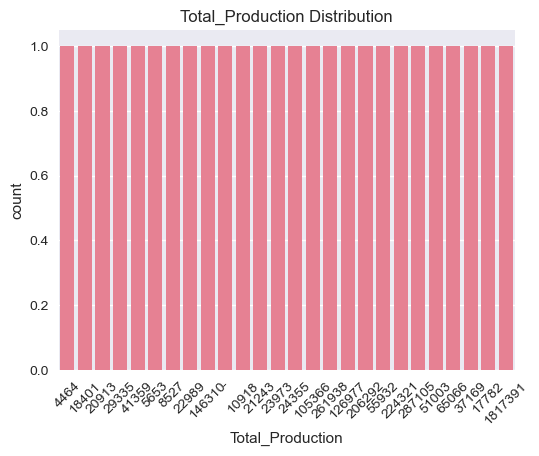

In [10]:
print("\n5. Creating Visualizations...")

# Set up the plotting area
fig = plt.figure(figsize=(20, 15))

# 1. Distribution plots
plt.subplot(3, 3, 1)
sns.countplot(data=df, x='Total_Production')
plt.title('Total_Production Distribution')
plt.xticks(rotation=45)

In [11]:


numeric_df = df.select_dtypes(include=[np.number]).dropna(axis=1, how='all')


correlation_matrix = numeric_df.corr()


if not correlation_matrix.empty and not correlation_matrix.isnull().all().all():
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Feature Correlation Heatmap')
    plt.show()
else:
    print("⚠️ No valid numeric data available for correlation heatmap.")


⚠️ No valid numeric data available for correlation heatmap.


#  Feature Engineering

In [12]:
if all(col in df.columns for col in ['Male_Farmers', 'Female_Farmers']):
    df['Total_Farmers'] = df['Male_Farmers'] + df['Female_Farmers']

if all(col in df.columns for col in ['Total_Production', 'Harvest_Area']):
    df['Yield_per_Hectare'] = df['Total_Production'] / df['Harvest_Area']

if 'Total_Farmers' in df.columns and 'Harvest_Area' in df.columns:
    df['Farmers_per_Hectare'] = df['Total_Farmers'] / df['Harvest_Area']

print("✅ New features created:")
for col in ['Total_Farmers', 'Yield_per_Hectare', 'Farmers_per_Hectare']:
    if col in df.columns:
        print(f"- {col}")

print("\n📌 First 5 rows with new features:")
print(df.head())

✅ New features created:

📌 First 5 rows with new features:
   District Major_Schemes_Sown Minor_Schemes_Sown Rainfed_Sown  \
0   COLOMBO                210                278         1730   
1   GAMPAHA               1570               1481         5609   
2  KALUTARA                112               1090         7930   
3     KANDY               4196               3296         2408   
4    MATALE               6820               4124          813   

  All_Schemes_Sown Major_Schemes_Harvested Minor_Schemes_Harvested  \
0             2218                     208                     278   
1             8660                    1454                    1474   
2             9132                     112                    1090   
3             9900                    4196                    3266   
4            11757                    6771                    4039   

  Rainfed_Harvested All_Schemes_Harvested Major_Schemes_Yield  \
0              1729                  2215                2

In [13]:
df.replace("-", np.nan, inplace=True)


for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')


if all(col in df.columns for col in ['Male_Farmers', 'Female_Farmers']):
    df['Total_Farmers'] = df['Male_Farmers'] + df['Female_Farmers']

if all(col in df.columns for col in ['Total_Production', 'Harvest_Area']):
    df['Yield_per_Hectare'] = df['Total_Production'] / df['Harvest_Area']

if 'Total_Farmers' in df.columns and 'Harvest_Area' in df.columns:
    df['Farmers_per_Hectare'] = df['Total_Farmers'] / df['Harvest_Area']

# Calculate correlation with target
if 'Total_Production' in df.columns:
    features_to_check = [col for col in ['Total_Farmers', 'Yield_per_Hectare', 'Farmers_per_Hectare'] if col in df.columns]

    numeric_df = df[features_to_check + ['Total_Production']].apply(pd.to_numeric, errors='coerce')
    correlation_with_target = numeric_df.corr()

    print("Correlation of new features with Total_Production:")
    print(correlation_with_target['Total_Production'].sort_values(ascending=False))
else:
    print("⚠️ Target column 'Total_Production' not found.")

Correlation of new features with Total_Production:
Total_Production    1.0
Name: Total_Production, dtype: float64


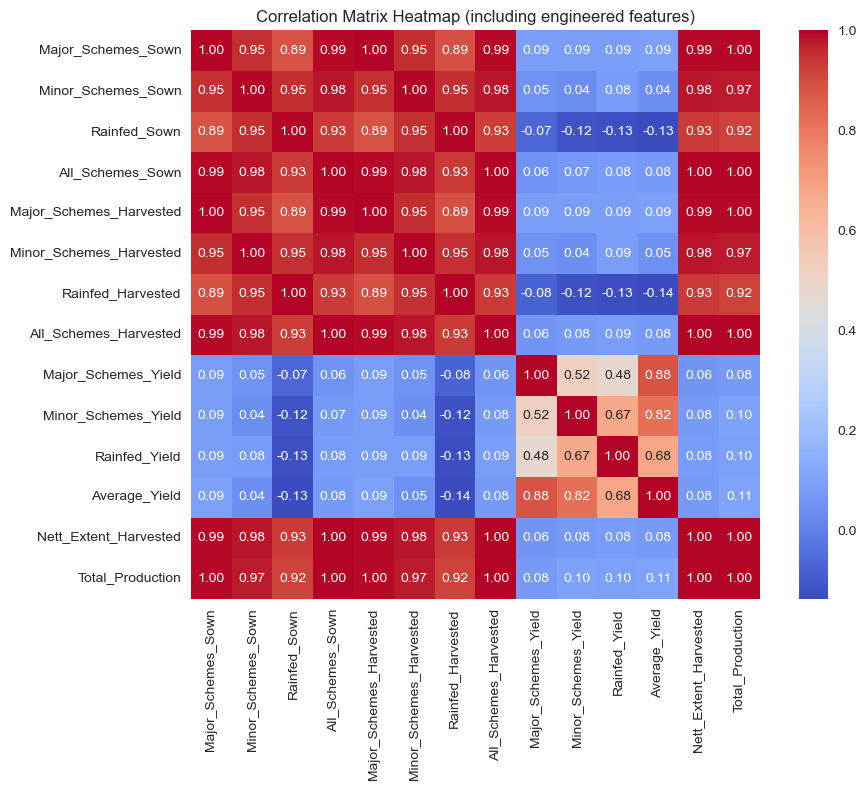

In [14]:
# Correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix Heatmap (including engineered features)")
plt.tight_layout()
plt.show()

#  Prepare Data for Training

In [15]:
df.replace("-", pd.NA, inplace=True)
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')

# Example features (adjust according to your CSV columns)
# Remove non-numeric text columns unless you plan to one-hot encode them
feature_cols = ['District', 'Major_Schemes_Sown', 'Minor_Schemes_Sown', 'Rainfed_Sown', 'All_Schemes_Sown', 'Major_Schemes_Harvested', 'Minor_Schemes_Harvested', 'Rainfed_Harvested', 'All_Schemes_Harvested', 'Major_Schemes_Yield', 'Minor_Schemes_Yield', 'Rainfed_Yield', 'Average_Yield', 'Nett_Extent_Harvested', 'Total_Production']
target_col = 'Total_Production'

# If you have categorical columns like 'Province', encode them
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col not in [target_col]]

df_encoded = pd.get_dummies(df[feature_cols + categorical_cols], drop_first=True)

# Define X (features) and y (target)
X = df_encoded.values
y = pd.to_numeric(df[target_col], errors='coerce').values  # Ensure numeric target

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

Feature matrix shape: (26, 64)
Target vector shape: (26,)


#  Split Data

In [16]:
target_col = 'Total_Production'


df = df.dropna(subset=[target_col])
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != target_col]

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# One-hot encode categorical features
df_encoded = pd.get_dummies(df[numeric_cols + categorical_cols], drop_first=True)

# Define X and y with matching indexes
X = df_encoded.values
y = df[target_col].values

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Shapes:")
print("X:", X.shape)
print("y:", y.shape)
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

Shapes:
X: (25, 37)
y: (25,)
X_train: (20, 37)
y_train: (20,)


In [17]:
y_train_int = y_train.astype(int)
y_test_int = y_test.astype(int)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Training set distribution: {np.bincount(y_train_int)}")
print(f"Test set distribution: {np.bincount(y_test_int)}")


Training set size: 20 samples
Test set size: 5 samples
Training set distribution: [0 0 0 ... 0 0 1]
Test set distribution: [0 0 0 ... 0 0 1]


# Feature Scaling

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✓ Features scaled using StandardScaler")

✓ Features scaled using StandardScaler


#  Model Training and Evaluation

In [19]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),  # No max_iter
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

In [20]:
df = df.replace("-", np.nan)
df = df.apply(pd.to_numeric, errors='ignore')

# Target column
target_col = "Total_Production"

# Ensure target exists
if target_col not in df.columns:
    raise ValueError(f"Target column '{target_col}' not found in CSV.")

# Separate features and target
X = df.drop(target_col, axis=1)
y = df[target_col]

# Fill missing numeric values with median
X = X.fillna(X.median(numeric_only=True))

# Fill missing categorical values with mode
X = X.fillna(X.mode().iloc[0])

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Fill any remaining NaNs in features
X = X.fillna(0)

# Drop rows where target is NaN
mask = ~y.isna()
X = X[mask]
y = y[mask]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model 1: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Model 2: Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
lr_preds = lr_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

# Metrics
print("✅ Models trained successfully: Linear Regression & Random Forest")
print("\n Linear Regression:")
print("MSE:", mean_squared_error(y_test, lr_preds))
print("R²:", r2_score(y_test, lr_preds))

print("\n Random Forest Regressor:")
print("MSE:", mean_squared_error(y_test, rf_preds))
print("R²:", r2_score(y_test, rf_preds))

✅ Models trained successfully: Linear Regression & Random Forest

 Linear Regression:
MSE: 275169582.8005036
R²: 0.9583860735347892

 Random Forest Regressor:
MSE: 591096628.84088
R²: 0.9106083913924031


# Use cross-validation for model evaluation

In [21]:
lr_scores = cross_val_score(
    lr_model, X, y,
    scoring='neg_mean_squared_error',
    cv=5
)
lr_rmse = np.sqrt(-lr_scores)
print("LogisticRegression RMSE for each fold:", lr_rmse)
print("LogisticRegression Average RMSE:", lr_rmse.mean())

# Random Forest cross-validation
rf_scores = cross_val_score(
    rf_model, X, y,
    scoring='neg_mean_squared_error',
    cv=5
)
rf_rmse = np.sqrt(-rf_scores)
print("\nRandom Forest RMSE for each fold:", rf_rmse)
print("Random Forest Average RMSE:", rf_rmse.mean())

LogisticRegression RMSE for each fold: [17760.63126154 22046.86796527 23488.58153384 58345.19366204
 16751.68450658]
LogisticRegression Average RMSE: 27678.59178585307

Random Forest RMSE for each fold: [  4193.94353605  22044.03046395  30909.97575897  62067.92367124
 712975.01994304]
Random Forest Average RMSE: 166438.17867464887


# Compare model performance using appropriate metrics

In [22]:
for col in ['District', 'Major_Schemes_Sown', 'Minor_Schemes_Sown']:
    if col in df.columns:
        df.drop(col, axis=1, inplace=True)

# Separate features & target
X = df.drop("Total_Production", axis=1)
y = df["Total_Production"]

# Fill missing numeric values
X = X.fillna(X.median(numeric_only=True))

# Fill missing categorical values & encode
X = X.fillna(X.mode().iloc[0])
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train models
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Logistic Regression performance
print("Logistic Regression Performance:")
print("-------------------------------")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.3f}")
print(f"Precision: {precision_score(y_test, y_pred_lr, average='weighted'):.3f}")
print(f"Recall: {recall_score(y_test, y_pred_lr, average='weighted'):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred_lr, average='weighted'):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

# Random Forest performance
print("\nRandom Forest Performance:")
print("--------------------------")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.3f}")
print(f"Precision: {precision_score(y_test, y_pred_rf, average='weighted'):.3f}")
print(f"Recall: {recall_score(y_test, y_pred_rf, average='weighted'):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf, average='weighted'):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Model comparison
if accuracy_score(y_test, y_pred_rf) > accuracy_score(y_test, y_pred_lr):
    print("\n✅ Random Forest performs better based on accuracy")
else:
    print("\n✅ Logistic Regression performs better based on accuracy")

Logistic Regression Performance:
-------------------------------
Accuracy: 0.000
Precision: 0.000
Recall: 0.000
F1 Score: 0.000

Classification Report:
              precision    recall  f1-score   support

      4464.0       0.00      0.00      0.00       1.0
      8527.0       0.00      0.00      0.00       0.0
     10918.0       0.00      0.00      0.00       0.0
     17782.0       0.00      0.00      0.00       1.0
     23973.0       0.00      0.00      0.00       1.0
     41359.0       0.00      0.00      0.00       0.0
     65066.0       0.00      0.00      0.00       0.0
    105366.0       0.00      0.00      0.00       0.0
    146310.0       0.00      0.00      0.00       1.0
    206292.0       0.00      0.00      0.00       1.0

    accuracy                           0.00       5.0
   macro avg       0.00      0.00      0.00       5.0
weighted avg       0.00      0.00      0.00       5.0

Confusion Matrix:
[[0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [

In [24]:
# Model comparison & selection
if accuracy_score(y_test, y_pred_rf) > accuracy_score(y_test, y_pred_lr):
    best_model = rf_model
    best_model_name = "Random Forest"
else:
    best_model = lr_model
    best_model_name = "Logistic Regression"

print(f"\n✅ Best model selected: {best_model_name}")


✅ Best model selected: Logistic Regression


In [25]:
# Save model
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print(f"✅ {best_model_name} saved as best_model.pkl")

✅ Logistic Regression saved as best_model.pkl


In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error

# 1. Load CSV and clean
df = pd.read_csv("2023 Yala.csv")

# Replace '-' and similar placeholders with NaN
df.replace(["-", "NA", "NaN", ""], np.nan, inplace=True)

# Ensure numeric columns are actually numeric
for col in df.columns:
    if col != "District":  # leave categorical as is
        df[col] = pd.to_numeric(df[col], errors='coerce')

# 2. Define features & multiple targets
target_columns = [
    "Total_Production",
    "Average_Yield",
    "Nett_Extent_Harvested",
    "Rainfed_Yield",
    "All_Schemes_Harvested"
]

# Drop rows where any of the targets are missing
df.dropna(subset=target_columns, inplace=True)

categorical_features = ["District"]
numeric_features = [col for col in df.columns if col not in categorical_features + target_columns]

X = df.drop(columns=target_columns)
y = df[target_columns]   # <-- multi-output target (DataFrame)

# 3. Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("num", SimpleImputer(strategy="median"), numeric_features),
        ("cat", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("encoder", OneHotEncoder(handle_unknown="ignore"))
        ]), categorical_features)
    ]
)

# 4. Model pipeline (RandomForest supports multi-output)
model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(
        n_estimators=500,
        max_depth=10,
        random_state=42
    ))
])

# 5. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. Fit model
model.fit(X_train, y_train)

# 7. Evaluate
y_pred = model.predict(X_test)

print("\nModel Performance:")
for i, col in enumerate(target_columns):
    print(f"{col} → R²: {r2_score(y_test[col], y_pred[:, i]):.3f}, "
          f"MAE: {mean_absolute_error(y_test[col], y_pred[:, i]):.2f}")

# 8. Prediction function with clear output
def predict_production():
    print("\n" + "="*60)
    print("🌾 AGRICULTURAL PRODUCTION PREDICTOR 🌾")
    print("="*60)
    print("Enter your field data:\n")

    try:
        data = {
            "District": input("District name: ").title(),
            "Major_Schemes_Sown": float(input("Major Schemes Sown: ")),
            "Minor_Schemes_Sown": float(input("Minor Schemes Sown: ")),
            "Rainfed_Sown": float(input("Rainfed Sown: ")),
            "All_Schemes_Sown": float(input("All Schemes Sown: ")),
            "Major_Schemes_Harvested": float(input("Major Schemes Harvested: ")),
            "Minor_Schemes_Harvested": float(input("Minor Schemes Harvested: ")),
            "Rainfed_Harvested": float(input("Rainfed Harvested: ")),
            "All_Schemes_Harvested": float(input("All Schemes Harvested: ")),
            "Major_Schemes_Yield": float(input("Major Schemes Yield: ")),
            "Minor_Schemes_Yield": float(input("Minor Schemes Yield: ")),
            "Rainfed_Yield": float(input("Rainfed Yield: ")),
        }
    except ValueError:
        print("\n❌ Invalid input! Please enter numerical values where required.")
        return

    input_df = pd.DataFrame([data])
    predictions = model.predict(input_df)[0]

    # Display formatted results
    print("\n" + "="*60)
    print("🌾 AGRICULTURAL PRODUCTION PREDICTION RESULTS 🌾")
    print("="*60)
    print(f"📍 District: {input_df['District'].values[0]}")
    print("-" * 60)

    for i, col in enumerate(target_columns):
        if col == "Total_Production":
            print(f"✅ {col}: {predictions[i]:,.2f} (metric tons)")
        elif "Yield" in col:
            print(f"🌱 {col}: {predictions[i]:,.2f} (tons/hectare)")
        elif "Extent" in col:
            print(f"🌾 {col}: {predictions[i]:,.2f} (hectares)")
        else:
            print(f"📊 {col}: {predictions[i]:,.2f}")

    print("="*60)

# 9. Test with example
print("\nTesting with a sample row from dataset...")
sample_input = X.iloc[[0]]
sample_prediction = model.predict(sample_input)[0]
print(f"📍 Sample District: {sample_input['District'].values[0]}")
for i, col in enumerate(target_columns):
    print(f"   → {col}: {sample_prediction[i]:,.2f}")

# 10. Interactive loop
while True:
    predict_production()
    if input("\nPredict again? (y/n): ").lower() != 'y':
        print("\n🙏 Thank you for using the Agricultural Production Predictor!")
        break



Model Performance:
Total_Production → R²: 0.871, MAE: 25440.62
Average_Yield → R²: 0.644, MAE: 598.55
Nett_Extent_Harvested → R²: 0.946, MAE: 3412.25
Rainfed_Yield → R²: -0.774, MAE: 567.37
All_Schemes_Harvested → R²: 0.934, MAE: 3735.78

Testing with a sample row from dataset...
📍 Sample District: COLOMBO
   → Total_Production: 15,328.69
   → Average_Yield: 3,277.68
   → Nett_Extent_Harvested: 4,898.51
   → Rainfed_Yield: 2,954.10
   → All_Schemes_Harvested: 6,092.26

🌾 AGRICULTURAL PRODUCTION PREDICTOR 🌾
Enter your field data:

District name: kandy
Major Schemes Sown: 562
Minor Schemes Sown: 6586
Rainfed Sown: 3535
All Schemes Sown: 9896
Major Schemes Harvested: 8000
Minor Schemes Harvested: 8400
Rainfed Harvested: 5000
All Schemes Harvested: 6000
Major Schemes Yield: 50000
Minor Schemes Yield: 25000
Rainfed Yield: 6500

🌾 AGRICULTURAL PRODUCTION PREDICTION RESULTS 🌾
📍 District: Kandy
------------------------------------------------------------
✅ Total_Production: 45,178.33 (metric 